Import Data

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as str

df = pd.read_csv('used_car_price.csv')

In [91]:
df.head()

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


Import Libraries

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

Data Preparation

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   object 
 1   model                 2059 non-null   object 
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   object 
 6   transmission          2059 non-null   object 
 7   color                 2059 non-null   object 
 8   owner                 2059 non-null   object 
 9   seller_type           2059 non-null   object 
 10  engine                1979 non-null   object 
 11  max_power             1979 non-null   object 
 12  max_torque            1979 non-null   object 
 13  drivetrain            1923 non-null   object 
 14  length_mm             1995 non-null   float64
 15  width_mm             

Find Missing Values

In [94]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

engine                   80
max_power                80
max_torque               80
drivetrain              136
length_mm                64
width_mm                 64
height_mm                64
seating_capacity         64
fuel_tank_capacity_l    113
dtype: int64


Remove missing rows

In [95]:
df = df.dropna()

In [96]:
print(df.isna().sum())

make                    0
model                   0
price_usd               0
year                    0
kilometer               0
fuel_type               0
transmission            0
color                   0
owner                   0
seller_type             0
engine                  0
max_power               0
max_torque              0
drivetrain              0
length_mm               0
width_mm                0
height_mm               0
seating_capacity        0
fuel_tank_capacity_l    0
dtype: int64


Drop Duplicate Information

In [97]:
duplicates_data = df.duplicated()
num_dup = duplicates_data.sum()
print("Numbers of Duplicate: ", num_dup)

Numbers of Duplicate:  4


In [98]:
df.drop_duplicates(inplace=True)

Change Datatype (From str to int)

In [99]:
# def extract_numerical_values(s):
#     values = s.split('@')[0].strip().split()
#     return float(values[0]), int(values[1])

df[['max_power_bhp','max_power_rpm']] = df['max_power'].str.split('@', expand = True)
# df['max_torque_Nm'], df['max_torque_rpm'] = zip(df['max_torque'].apply(extract_numerical_values))

# df.drop(['max_power', 'max_torque'], axis=1, inplace=True)

# print(df)
df

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,...,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,...,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,...,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,...,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,...,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,...,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,2940,2014,79000,Petrol,Manual,White,Second,Individual,...,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0,85 bhp,6000 rpm
2054,Mahindra,XUV500 W8 [2015-2017],10200,2016,90300,Diesel,Manual,White,First,Individual,...,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,138 bhp,3750 rpm
2055,Hyundai,Eon D-Lite +,3300,2014,83000,Petrol,Manual,White,Second,Individual,...,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,55 bhp,5500 rpm
2056,Ford,Figo Duratec Petrol ZXI 1.2,2880,2013,73000,Petrol,Manual,Silver,First,Individual,...,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,70 bhp,6250 rpm


In [100]:
df[['max_torque_bhp','max_torque_rpm']] = df['max_torque'].str.split('@', expand = True)
df

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,...,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm,max_torque_bhp,max_torque_rpm
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm,109 Nm,4500 rpm
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm,190 Nm,2000 rpm
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm,112.7619 Nm,4000 rpm
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm,113 Nm,4200 rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm,343 Nm,1400 rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,2940,2014,79000,Petrol,Manual,White,Second,Individual,...,FWD,3775.0,1680.0,1620.0,5.0,43.0,85 bhp,6000 rpm,113 Nm,4500 rpm
2054,Mahindra,XUV500 W8 [2015-2017],10200,2016,90300,Diesel,Manual,White,First,Individual,...,FWD,4585.0,1890.0,1785.0,7.0,70.0,138 bhp,3750 rpm,330 Nm,1600 rpm
2055,Hyundai,Eon D-Lite +,3300,2014,83000,Petrol,Manual,White,Second,Individual,...,FWD,3495.0,1550.0,1500.0,5.0,32.0,55 bhp,5500 rpm,75 Nm,4000 rpm
2056,Ford,Figo Duratec Petrol ZXI 1.2,2880,2013,73000,Petrol,Manual,Silver,First,Individual,...,FWD,3795.0,1680.0,1427.0,5.0,45.0,70 bhp,6250 rpm,102 Nm,4000 rpm


Feature Selection

In [101]:
df.drop(columns=['model'], inplace=True)

In [102]:
df

,make,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,...,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm,max_torque_bhp,max_torque_rpm
0,Honda,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87 bhp,6000 rpm,109 Nm,4500 rpm
1,Maruti Suzuki,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74 bhp,4000 rpm,190 Nm,2000 rpm
2,Hyundai,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79 bhp,6000 rpm,112.7619 Nm,4000 rpm
3,Toyota,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82 bhp,6000 rpm,113 Nm,4200 rpm
4,Toyota,23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148 bhp,3400 rpm,343 Nm,1400 rpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,2940,2014,79000,Petrol,Manual,White,Second,Individual,1197 cc,...,FWD,3775.0,1680.0,1620.0,5.0,43.0,85 bhp,6000 rpm,113 Nm,4500 rpm
2054,Mahindra,10200,2016,90300,Diesel,Manual,White,First,Individual,2179 cc,...,FWD,4585.0,1890.0,1785.0,7.0,70.0,138 bhp,3750 rpm,330 Nm,1600 rpm
2055,Hyundai,3300,2014,83000,Petrol,Manual,White,Second,Individual,814 cc,...,FWD,3495.0,1550.0,1500.0,5.0,32.0,55 bhp,5500 rpm,75 Nm,4000 rpm
2056,Ford,2880,2013,73000,Petrol,Manual,Silver,First,Individual,1196 cc,...,FWD,3795.0,1680.0,1427.0,5.0,45.0,70 bhp,6250 rpm,102 Nm,4000 rpm


In [103]:
# Convert 'engine' column to numeric
df['engine'] = df['engine'].str.extract(r'(\d+)')
df['engine'] = pd.to_numeric(df['engine'])

# Convert 'max_power_bhp' column to numeric
df['max_power_bhp'] = df['max_power_bhp'].str.extract(r'(\d+)')
df['max_power_bhp'] = pd.to_numeric(df['max_power_bhp'])

# Convert 'max_power_rpm' column to numeric
df['max_power_rpm'] = df['max_power_rpm'].str.extract(r'(\d+)')
df['max_power_rpm'] = pd.to_numeric(df['max_power_rpm'])

# Convert 'max_torque_bhp' column to numeric
df['max_torque_bhp'] = df['max_torque_bhp'].str.extract(r'(\d+)')
df['max_torque_bhp'] = pd.to_numeric(df['max_torque_bhp'])

# Convert 'max_torque_rpm' column to numeric
df['max_torque_rpm'] = df['max_torque_rpm'].str.extract(r'(\d+)')
df['max_torque_rpm'] = pd.to_numeric(df['max_torque_rpm'])


In [104]:
df

,make,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,...,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l,max_power_bhp,max_power_rpm,max_torque_bhp,max_torque_rpm
0,Honda,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87,6000.0,109,4500
1,Maruti Suzuki,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74,4000.0,190,2000
2,Hyundai,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79,6000.0,112,4000
3,Toyota,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82,6000.0,113,4200
4,Toyota,23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148,3400.0,343,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,2940,2014,79000,Petrol,Manual,White,Second,Individual,1197,...,FWD,3775.0,1680.0,1620.0,5.0,43.0,85,6000.0,113,4500
2054,Mahindra,10200,2016,90300,Diesel,Manual,White,First,Individual,2179,...,FWD,4585.0,1890.0,1785.0,7.0,70.0,138,3750.0,330,1600
2055,Hyundai,3300,2014,83000,Petrol,Manual,White,Second,Individual,814,...,FWD,3495.0,1550.0,1500.0,5.0,32.0,55,5500.0,75,4000
2056,Ford,2880,2013,73000,Petrol,Manual,Silver,First,Individual,1196,...,FWD,3795.0,1680.0,1427.0,5.0,45.0,70,6250.0,102,4000


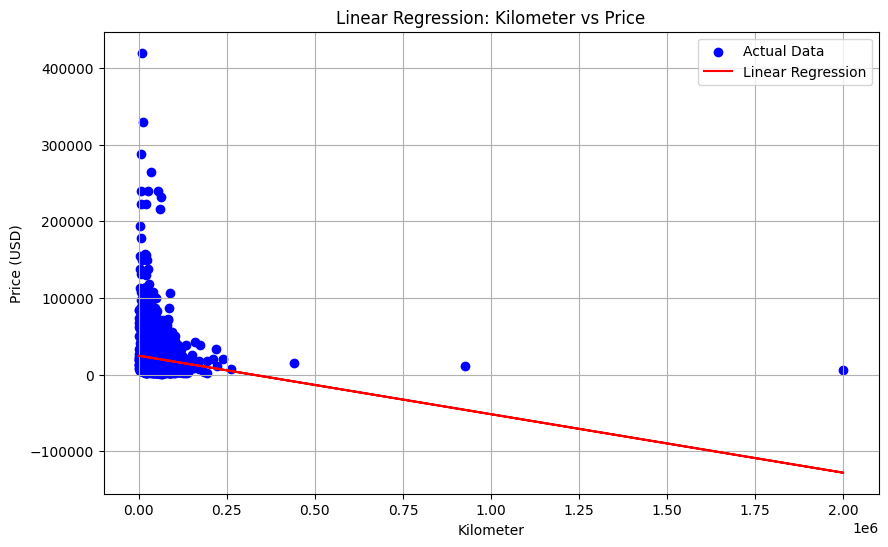

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df_renovate is a DataFrame containing your data
df_renovate = pd.read_csv('used_car_price.csv')  # Replace 'your_data.csv' with your actual data file

X = df_renovate['kilometer'].values
y = df_renovate['price_usd'].values

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

y_pred_lr = lr.predict(X.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_lr, color='red', label='Linear Regression')
plt.title('Linear Regression: Kilometer vs Price')
plt.xlabel('Kilometer')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
r_squared = lr.score(X.reshape(-1, 1), y)
print(f"R-squared value: {r_squared}")

R-squared value: 0.022748173421355933


Train RMSE: 16864.65208793222
Test RMSE: 23321.90500580849
Train r2: 0.6453558036142135
Test r2: 0.4593465448283931


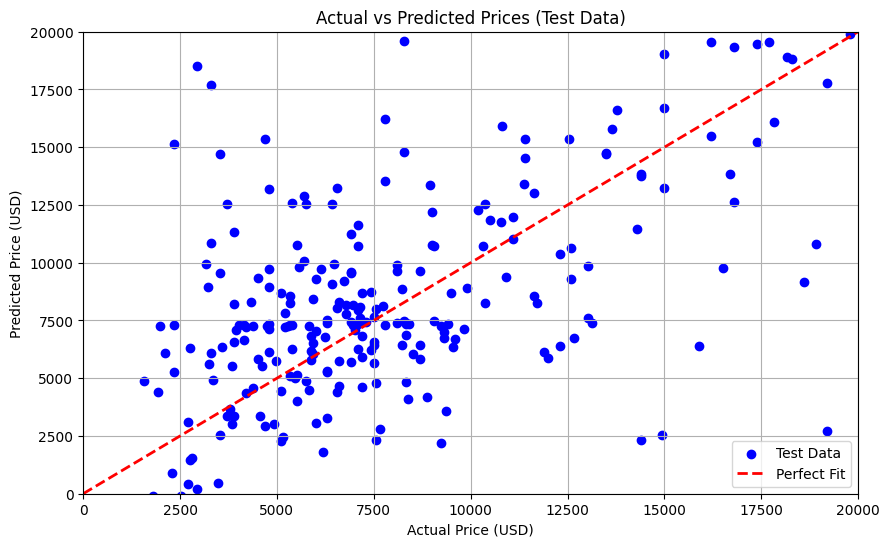

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = df_renovate[['kilometer', 'engine', 'fuel_tank_capacity_l']].values
y = df_renovate['price_usd'].values

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)

y_pred_train = poly_lr.predict(X_train)
y_pred_test = poly_lr.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2t = r2_score(y_train, y_pred_train)
r2s = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train r2: {r2t}")
print(f"Test r2: {r2s}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Test Data')
plt.plot([0, 20000], [0, 20000], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.title('Actual vs Predicted Prices (Test Data)')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.xlim(0, 20000)  # Limit x-axis to 20000
plt.ylim(0, 20000)  # Limit y-axis to 20000
plt.legend()
plt.grid(True)
plt.show()


In [140]:
coefficients = poly_lr.coef_
intercept = poly_lr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i}: {coef}")


Intercept: -9742.991321710466
Coefficients:
Feature 0: 0.0
Feature 1: 0.4245626439702764
Feature 2: 40.541667965785805
Feature 3: -1416.8269749935055
Feature 4: 8.023768421905331e-08
Feature 5: -9.982958020019264e-05
Feature 6: -0.008872359341617404
Feature 7: 0.008388157259356283
Feature 8: -0.9229033682449462
Feature 9: 36.53610199292487
